In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
import seaborn as sns
import hdbscan

In [2]:
df = pd.read_csv('Dry_Bean_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.pairplot(df, hue='Class', palette='Dark2')

KeyboardInterrupt: 

In [3]:
# def visualizar_dataset(data_frame):
#     x = data_frame["Perimeter"]
#     y = data_frame["Area"]
    
#     return pd.DataFrame(np.column_stack([x, y]), columns=["Perimeter", "Area"])

# data_frame_visualizar = visualizar_dataset(df)

In [4]:
df.Class = df.Class.astype('category').cat.codes

In [5]:
HOW_SCALE = 'minmax'


x = df.drop("Class", axis=1).to_numpy()
y = df["Class"]

if HOW_SCALE == "standard":
    print('standard')
    scaler=StandardScaler()
    X = scaler.fit_transform(x)
elif HOW_SCALE == "minmax":
    scaler = MinMaxScaler()
    X = scaler.fit_transform(x)

Text(0, 0.5, 'Varianza Explicada')

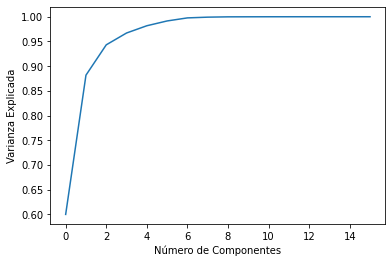

In [6]:
pca_curve = PCA().fit(X)
plt.plot(np.cumsum(pca_curve.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')

In [7]:
pca = PCA(n_components=6)
tsne = TSNE()
X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)
X_pca_tsne = tsne.fit_transform(X_pca)

KeyboardInterrupt: 

In [ ]:

def cluster_hdbscan(x, n_clusters):
    db = hdbscan.HDBSCAN(min_cluster_size=n_clusters)
    db.fit_predict(x)
    # print(db)
    # print(db.labels_)
    return db.labels_

def cluster_kmeans(x, n_clusters):
    return cluster.k_means(x, n_clusters=n_clusters)[1]

def cluster_ac(x, n_clusters):
    ac = cluster.AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    ac.fit(x)
    return ac.labels_



HDBSCAN(min_cluster_size=2)
[1 1 1 ... 1 1 1]
HDBSCAN(min_cluster_size=3)
[ 4 -1  4 ...  4  4  4]
HDBSCAN(min_cluster_size=4)
[ 2 -1  2 ...  2  2  2]
HDBSCAN()
[ 2 -1  2 ...  2  2  2]
HDBSCAN(min_cluster_size=6)
[ 1 -1  1 ...  1  1  1]
HDBSCAN(min_cluster_size=7)
[1 1 1 ... 1 1 1]


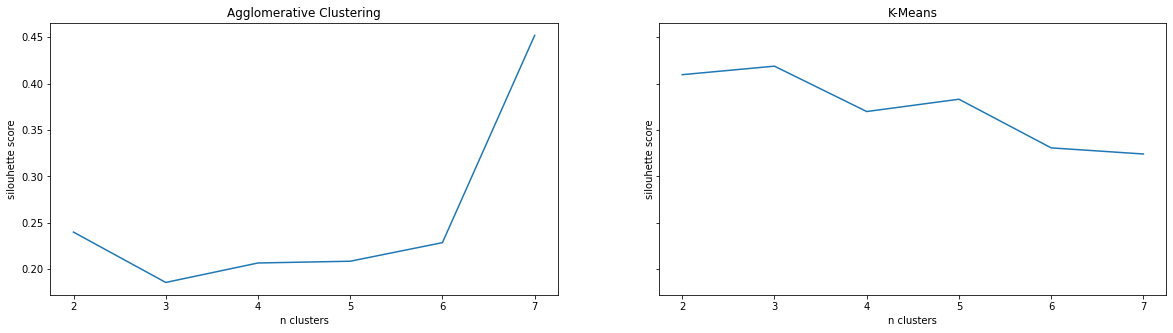

In [93]:
def calcular_silhouette(x, c):
    fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
    
    methodos = [cluster_hdbscan, cluster_kmeans, cluster_ac]
    for i, m in enumerate(methodos):
        res = []
        for c in range(2, 10):
            res += [silhouette_score(x, m(x, c))]
            
        ax[i].plot(range(2, 10), res)
        ax[i].set_xlabel("n clusters")
        ax[i].set_ylabel("silouhette score")
        if(i==0):
            ax[i].set_title('HDBSCAN')
        elif(i==1)
            ax[i].set_title('KMEANS')
        else:
            ax[i].set_title('Agglomerative Clustering')

calcular_silhouette(X, y)